In [1]:
import xarray as xr

In [2]:
ds1 = xr.open_dataset('/home/users/fmaussion/www_oggm/cmip6/GCM/CESM2-WACCM/CESM2-WACCM_ssp534-over_r1i1p1f1_pr.nc', use_cftime=True)

In [3]:
ds1.time

<xarray.DataArray 'time' (time: 5400)>
array([cftime.DatetimeNoLeap(1850, 1, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 14, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 15, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2299, 10, 15, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2299, 11, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2299, 12, 15, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2299-12-15 12:00:00
Attributes:
    standard_name:  time
    bounds:         time_bnds
    axis:           T

In [4]:
ds2 = xr.open_dataset('/home/users/fmaussion/www_oggm/cmip6/GCM/MRI-ESM2-0/MRI-ESM2-0_ssp534-over_r1i1p1f1_pr.nc', use_cftime=True)

In [36]:
ts1 = ds1.pr.sel(lon=13, lat=43, method='nearest').sel(time=slice('1850', '2299'))
ts2 = ds2.pr.sel(lon=13, lat=43, method='nearest').sel(time=slice('1850', '2299'))

In [47]:
import cftime

In [ ]:
cftime.datetime

In [37]:
ts1 = ts1.resample(time='AS').mean()
ts2 = ts2.resample(time='AS').mean()

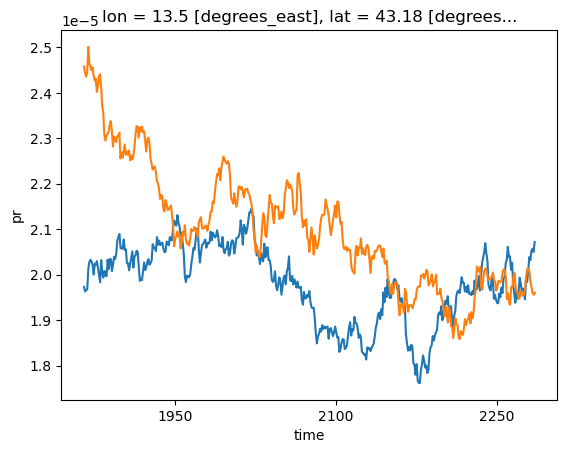

In [39]:
ts1.rolling(time=30, center=True).mean().plot();
ts2.rolling(time=30, center=True).mean().plot();

In [48]:
df = ts1.to_dataframe('DS1')[['DS1']]

In [50]:
df['DS2'] = ts1.sel(time=slice('2000', '2299')).to_dataframe('DS2')[['DS2']]

In [51]:
df

DS1       DS2
time                                   
1850-01-01 00:00:00  0.000018       NaN
1851-01-01 00:00:00  0.000017       NaN
1852-01-01 00:00:00  0.000021       NaN
1853-01-01 00:00:00  0.000015       NaN
1854-01-01 00:00:00  0.000021       NaN
...                       ...       ...
2295-01-01 00:00:00  0.000018  0.000018
2296-01-01 00:00:00  0.000026  0.000026
2297-01-01 00:00:00  0.000022  0.000022
2298-01-01 00:00:00  0.000019  0.000019
2299-01-01 00:00:00  0.000022  0.000022

[450 rows x 2 columns]

In [45]:
df['DS2'] = ts2.to_dataframe('DS2')['DS2'].values

In [46]:
df

DS1       DS2
time                                   
1850-01-01 00:00:00  0.000018  0.000022
1851-01-01 00:00:00  0.000017  0.000024
1852-01-01 00:00:00  0.000021  0.000021
1853-01-01 00:00:00  0.000015  0.000018
1854-01-01 00:00:00  0.000021  0.000034
...                       ...       ...
2295-01-01 00:00:00  0.000018  0.000014
2296-01-01 00:00:00  0.000026  0.000015
2297-01-01 00:00:00  0.000022  0.000018
2298-01-01 00:00:00  0.000019  0.000019
2299-01-01 00:00:00  0.000022  0.000019

[450 rows x 2 columns]

In [14]:
ts2.resample(time='AS').mean().time

<xarray.DataArray 'time' (time: 451)>
array([cftime.DatetimeProlepticGregorian(1850, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1851, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(1852, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeProlepticGregorian(2298, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(2299, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeProlepticGregorian(2300, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
    lon      float64 13.5
    lat      float64 43.18
  * time     (time) object 1850-01-01 00:00:00 ... 2300-01-01 00:00:00

In [ ]:
ds2.time